# Python Machine Learning for Biology
# Hyperparameter Tuning

What is a hyperparameter?    

We'll go over some best practices for building machine learning models by fine-tuning hyperparameters and evaluating model performance.  

We'll cover:  
* Cross-Validation: Getting unbiased estimates of model performance
* Learning and Validation Curves: Diagnosing common problems
* GridSearch: Fine-tuning machine learning algorithms
* Evaluating models using different performance metrics

# Independent Work (Review)
Peform a logistic regression on the cancer dataset
1. import the cancer dataset
2. create X and y variables
3. encode categorical variables
4. split data into testing and training datasets (80:20)
5. standardize the data
6. perform a logistic regression
7. report the accuracy score

In [210]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cancer = pd.read_csv("data/cancer.csv")

In [114]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
X = cancer.iloc[:, 1:].values

In [116]:
y = cancer['diagnosis'].values

In [117]:
le = LabelEncoder()

In [118]:
le.fit_transform(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

(Side note: we can figure out what it labeled each class of tumor)

In [119]:
le.transform(['M', 'B'])

array([1, 0])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 5)

In [121]:
stdscl = StandardScaler()

In [122]:
X_train_std = stdscl.fit_transform(X_train)

In [123]:
X_test_std = stdscl.transform(X_test)

In [124]:
logreg = LogisticRegression()

In [125]:
logreg.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
logreg.score(X_test_std, y_test)

0.9736842105263158

## Cross Validation

*Let's review*
* Why don't we evaluate using our training data?
* What is overfitting? 
* What is underfitting?  
* What are the drawbacks of train/test/split?

Two techniques to try to figure out our model's generalization error are **holdout validation** and **k-fold cross validation.** 

### Holdout validation (AKA Train/Test/Split)

We've been doing holdout validation, where we separate the dataset into training and testing datasets. But if we do lots of **model selection**, that is tune our hyper-parameters to see which give us the best model, we start reusing that same test dataset over and over again. Then the model is likely to overfit.  

A better way of using the holdout method is to divide the dataset into three parts: a training set, a test set, and a validation set. Use the training set to fit the model, use the validation set to compare model performance among different models, and use the test set to test model generalizability. This is a way less biased way to do it because the model has never seen the test data before.  

<img src="assets/traintestsplit.png"/>

A disadvantage of this method is that it is sensitive to how we divide up the data. 

*But what if we created a bunch of train/test/splits, calculated the test accuracy for each, and averaged these?* That is the essence of **k-fold cross validation.**

### K-fold Cross Validation

1. Split the data into *k* sets (folds) without replacement. 
2. Use *k-1* sets on model training and use 1 for model testing. 
3. Repeat *k* times, using a different set for the testing set each time. We'll have *k* models and *k* performance estimates.  

Then we can calculate the average performance of the model based on the *k* folds so we have a performance estimate that is less biased to how we sliced and diced the data. 

The standard value of *k* that people use is 10 (has been shown in experients to give a good out-of-sample accuracy). It's a good idea to use a larger *k* if you are working with a smaller dataset (lower generalization bias the higher your *k*). Larger values of *k* will have a slower runtime.  

<img src="assets/kfolds.png"/>

**Stratified k-fold cross validation** has even better bias and variance estimates, especially if you have really unequal class proportions. This method preserves the class proportions in each fold. `cross_val_score` does this by default.

***Train/test/split may still be the better option if you need speed***

#### Perform a stratified k-fold cross validation on the cancer dataset

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
scores = cross_val_score(estimator = logreg, X = X_train_std, y = y_train, cv = 10, n_jobs = 1)

In [129]:
print(scores)

[1.         1.         0.97826087 0.97826087 0.93333333 1.
 0.97777778 1.         0.97777778 0.97777778]


In [130]:
print(scores.mean(), scores.std())

0.9823188405797101 0.019351670536648408


## Independent Work
Select the best hyperparameters (K) for a KNN of the iris dataset using stratified cross validation scores.

**Bonus** Compare the best K of KNN to a Logistic Regression for the iris dataset to see which model performs better (with stratified cross validation).

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
iris = pd.read_csv("data/iris.csv")

In [160]:
features = ['sepal_width','sepal_length','petal_width','petal_length']
X_iris = iris[features]

In [161]:
y_iris = iris.species

In [162]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X_iris, y_iris, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [163]:
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


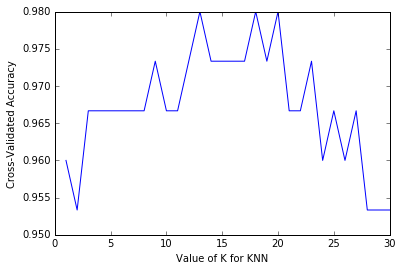

In [164]:
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [138]:
knn = KNeighborsClassifier(n_neighbors = 5)
print(cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy').mean())

0.9666666666666668


In [139]:
logreg = LogisticRegression()
print (cross_val_score(logreg, X, y, cv = 10, scoring = 'accuracy').mean())

0.9533333333333334


## Grid Search: fine-tuning models

*Review:* 
Which parameters does the machine learning model "learn"? Which are parameters we have to tune?  

Validation curves help us figure out an optimal value of one hyperparameter. Grid search helps us find optimal combinations of hyperparameters.

This will be more efficient than the for loops we were using when trying to find the best K for KNN.

#### Perform a grid search on an SVM of our cancer data

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline

In [148]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

In [149]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [150]:
param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

In [151]:
gs = GridSearchCV(estimator = pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

In [152]:
gs = gs.fit(X_train, y_train)

In [153]:
print(gs.best_score_)

0.978021978021978


In [154]:
print(gs.best_params_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [155]:
# use the test dataset to estimate model performance
clf = gs.best_estimator_

In [156]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [157]:
clf.score(X_test, y_test)

0.9736842105263158

## Independent Exercise
Perform a gridsearch to find the best K for a KNN of the iris dataset

In [158]:
k_range = range(1, 31)

In [159]:
param_grid = dict(n_neighbors = k_range)

In [167]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')

In [168]:
grid.fit(X_iris, y_iris)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [174]:
grid.grid_scores_

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [175]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


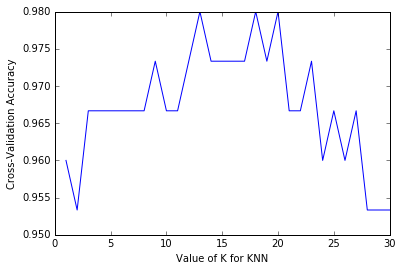

In [176]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validation Accuracy")

In [177]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Reducing Computaional Expense Using `RandomizedSearchCV`
* Doing an exhaustive search of many different parameters at once can become quickly computationally infeasible
* `RandomizedSearchCV` searches a subset of the paramters, and you control the computational "budget"

In [178]:
from sklearn.grid_search import RandomizedSearchCV

#### Specify parameter distributions rather than a parameter grid
We'll use the iris dataset and KNN for this just to demo. *Note: If we had a continuous parameter, we would need to specify a continuous distribution*

In [179]:
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

In [180]:
param_dist = dict(n_neighbors = k_range, weights = weight_options)

In [181]:
rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', random_state = 5)

In [182]:
rand.fit(X_iris, y_iris)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

In [183]:
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

Generally, we recommend starting with `gridSearchCV` and switching to `randomSearchCV` only if things get computationally hairy. 

### Nested cross-validation

Earlier we combined k-fold cross validation and grid search to fine-tune our hyperparameters. A better way to do this is with **nested cross-validation.**  

**Nested cross-validation** is when we have an outer k-fold cross-validation loop to split the data into training and testing folds and an inner loop used to select a model using k-fold cross-validation on the training fold. After model selection, we evaluate model performance on our test fold. 

<img src="assets/nestedcv.png"/>

#### Nested cross-validation on our cancer dataset with an SVM (This is a 5x2 cross-validation)

In [160]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=2,
                 n_jobs = -1)

In [161]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=5)

In [162]:
print(np.mean(scores), np.std(scores))

0.964835164835 0.0254413997864


#### Use nested cross-validation to compare SVM to another algorithm

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid = [{'max_depth': [1,2,3,4,5,6,7, None]}],
                 scoring='accuracy',
                 cv=5)

In [172]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=2)

In [173]:
print(np.mean(scores), np.std(scores))

0.905527861504 0.015176984311
